# Pixar History Analysis

## Import Necessary Libraries

In [1]:
#Manipulation libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#Statistical libraries
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Initial Examination of Datasets

### Pixar Films Data
Containing main information of films, including title, release date, run time, film rating, and plot

In [2]:
pixar_films = pd.read_csv("pixar_films.csv")

In [3]:
pixar_films['release_date'] = pd.to_datetime(pixar_films['release_date'])

In [4]:
pixar_films.head()

,number,film,release_date,run_time,film_rating,plot
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h..."
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ..."
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s..."
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...


In [5]:
pixar_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   number        28 non-null     int64         
 1   film          28 non-null     object        
 2   release_date  28 non-null     datetime64[ns]
 3   run_time      28 non-null     int64         
 4   film_rating   28 non-null     object        
 5   plot          28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ KB


In [6]:
pixar_films.describe()

,number,release_date,run_time
count,28.000000,28,28.000000
mean,14.500000,2012-11-18 21:25:42.857142784,100.392857
min,1.000000,1995-11-22 00:00:00,81.000000
25%,7.750000,2007-03-24 18:00:00,95.000000
50%,14.500000,2014-06-20 00:00:00,100.000000
75%,21.250000,2019-08-24 18:00:00,104.250000
max,28.000000,2024-06-14 00:00:00,118.000000
std,8.225975,NaN,8.047725


In [7]:
pixar_films.isna().sum()

number          0
film            0
release_date    0
run_time        0
film_rating     0
plot            0
dtype: int64

With regards to release date, the next step is to extract relevant information that can be useful, such as release month, quarter, year, and decade

In [8]:
pixar_films['release_month'] = pixar_films['release_date'].dt.month
pixar_films['release_quarter'] = pixar_films['release_date'].dt.quarter
pixar_films['release_year'] = pixar_films['release_date'].dt.year
pixar_films['release_decade'] = (pixar_films['release_year'] // 10) * 10

In [9]:
pixar_films.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000


### Pixar People Data
Containing information of people's roles in producing films

In [10]:
pixar_people = pd.read_csv("pixar_people.csv")

In [11]:
pixar_people.head()

,film,role_type,name
0,Toy Story,Director,John Lasseter
1,Toy Story,Musician,Randy Newman
2,Toy Story,Producer,Bonnie Arnold
3,Toy Story,Producer,Ralph Guggenheim
4,Toy Story,Screenwriter,Joel Cohen


In [12]:
pixar_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   film       260 non-null    object
 1   role_type  260 non-null    object
 2   name       260 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [13]:
pixar_people.describe()

,film,role_type,name
count,260,260,260
unique,28,6,95
top,Toy Story 2,Storywriter,Andrew Stanton
freq,14,84,20


In [14]:
pixar_people.isna().sum()

film         0
role_type    0
name         0
dtype: int64

### Genres Data

Containing information of films' genres and subgenres

In [15]:
genres = pd.read_csv("genres.csv")

In [16]:
genres.head()

,film,category,value
0,Toy Story,Genre,Adventure
1,Toy Story,Genre,Animation
2,Toy Story,Genre,Comedy
3,Toy Story,Subgenre,Buddy Comedy
4,Toy Story,Subgenre,Computer Animation


In [17]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   film      204 non-null    object
 1   category  204 non-null    object
 2   value     204 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


In [18]:
genres.describe()

,film,category,value
count,204,204,204
unique,28,2,39
top,Cars 2,Subgenre,Adventure
freq,9,120,28


In [19]:
genres.isna().sum()

film        0
category    0
value       0
dtype: int64

### Box Office Data
Containing information of films' production budgets and box office earnings

In [20]:
box_office = pd.read_csv("box_office.csv")

In [21]:
box_office.head()

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide
0,Toy Story,30000000.0,223225679,171210907,394436586
1,A Bug's Life,120000000.0,162798565,200460294,363258859
2,Toy Story 2,90000000.0,245852179,265506097,511358276
3,"Monsters, Inc.",115000000.0,255873250,272900000,528773250
4,Finding Nemo,94000000.0,339714978,531300000,871014978


In [22]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film                  28 non-null     object 
 1   budget                27 non-null     float64
 2   box_office_us_canada  28 non-null     int64  
 3   box_office_other      28 non-null     int64  
 4   box_office_worldwide  28 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


In [23]:
box_office.describe()

,budget,box_office_us_canada,box_office_other,box_office_worldwide
count,2.700000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,1.611481e+08,2.475444e+08,3.611199e+08,6.086643e+08
std,4.522142e+07,1.631609e+08,2.300110e+08,3.826497e+08
min,3.000000e+07,9.461540e+05,2.041436e+07,2.181336e+07
25%,1.350000e+08,1.540453e+08,2.069555e+08,3.787627e+08
50%,1.750000e+08,2.305457e+08,3.218588e+08,5.338782e+08
75%,2.000000e+08,3.046819e+08,5.086871e+08,8.253837e+08
max,2.000000e+08,6.529802e+08,1.045051e+09,1.698031e+09


In [24]:
box_office.isna().sum()

film                    0
budget                  1
box_office_us_canada    0
box_office_other        0
box_office_worldwide    0
dtype: int64

Since one entry has no budget value, this value will be imputed with the median budget.

In [25]:
box_office['budget'].fillna(value=box_office['budget'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\1023510796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  box_office['budget'].fillna(value=box_office['budget'].median(), inplace=True)


In [26]:
box_office.isna().sum()

film                    0
budget                  0
box_office_us_canada    0
box_office_other        0
box_office_worldwide    0
dtype: int64

### Public Response Data

In [27]:
public_response = pd.read_csv("public_response.csv")

In [28]:
public_response.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100.0,96,95.0,26,A,8.3,1089101
1,A Bug's Life,92.0,91,78.0,23,A,7.2,319596
2,Toy Story 2,100.0,172,88.0,34,A+,7.9,630573
3,"Monsters, Inc.",96.0,199,79.0,35,A+,8.1,1000657
4,Finding Nemo,99.0,270,90.0,38,A+,8.2,1132877


In [29]:
public_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   film                    28 non-null     object 
 1   rotten_tomatoes_score   28 non-null     float64
 2   rotten_tomatoes_counts  28 non-null     int64  
 3   metacritic_score        28 non-null     float64
 4   metacritic_counts       28 non-null     int64  
 5   cinema_score            25 non-null     object 
 6   imdb_score              28 non-null     float64
 7   imdb_counts             28 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.9+ KB


In [30]:
public_response.describe()

,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,imdb_score,imdb_counts
count,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01
mean,88.357143,273.821429,78.142857,43.464286,7.542857,5.256077e+05
std,13.447330,84.248773,12.408821,9.558716,0.658522,3.688713e+05
min,40.000000,91.000000,57.000000,23.000000,6.100000,1.270450e+05
25%,79.750000,220.000000,68.250000,37.000000,7.175000,1.955322e+05
50%,94.500000,266.000000,79.500000,41.000000,7.550000,3.958430e+05
75%,97.000000,324.000000,88.500000,52.000000,8.100000,8.385082e+05
max,100.000000,459.000000,96.000000,59.000000,8.400000,1.226415e+06


In [31]:
public_response.isna().sum()

film                      0
rotten_tomatoes_score     0
rotten_tomatoes_counts    0
metacritic_score          0
metacritic_counts         0
cinema_score              3
imdb_score                0
imdb_counts               0
dtype: int64

In [32]:
public_response['cinema_score'].value_counts()

cinema_score
A     15
A+     7
A-     3
Name: count, dtype: int64

In [33]:
public_response['cinema_score'].fillna(value='A', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\3701336585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  public_response['cinema_score'].fillna(value='A', inplace=True)


In [34]:
public_response.isna().sum()

film                      0
rotten_tomatoes_score     0
rotten_tomatoes_counts    0
metacritic_score          0
metacritic_counts         0
cinema_score              0
imdb_score                0
imdb_counts               0
dtype: int64

In [35]:
public_response['cinema_score'] = public_response['cinema_score'].replace({'A+': 4.0, 'A': 3.7, 'A-': 3.3})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\3404033585.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  public_response['cinema_score'] = public_response['cinema_score'].replace({'A+': 4.0, 'A': 3.7, 'A-': 3.3})


In [36]:
public_response.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100.0,96,95.0,26,3.7,8.3,1089101
1,A Bug's Life,92.0,91,78.0,23,3.7,7.2,319596
2,Toy Story 2,100.0,172,88.0,34,4.0,7.9,630573
3,"Monsters, Inc.",96.0,199,79.0,35,4.0,8.1,1000657
4,Finding Nemo,99.0,270,90.0,38,4.0,8.2,1132877


### Academy Data

In [37]:
academy = pd.read_csv("academy.csv")

In [38]:
academy.head()

,film,award_type,status
0,Toy Story,Animated Feature,Award not yet introduced
1,Toy Story,Original Screenplay,Nominated
2,Toy Story,Adapted Screenplay,Ineligible
3,Toy Story,Original Score,Nominated
4,Toy Story,Original Song,Nominated


In [39]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   film        89 non-null     object
 1   award_type  89 non-null     object
 2   status      89 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [40]:
academy.describe()

,film,award_type,status
count,89,89,89
unique,28,9,5
top,WALL-E,Animated Feature,Nominated
freq,7,22,40


In [41]:
academy.isna().sum()

film          0
award_type    0
status        0
dtype: int64

## Examine Financial Performance of Pixar Films: Which Films Were The Most Successful In Terms Of Return On Investment?

In [42]:
box_office['roi'] = ((box_office['box_office_worldwide'] - box_office['budget']) / box_office['budget']) * 100

In [43]:
box_office_roi_sorted = box_office.sort_values(by='roi', ascending=False)

In [44]:
box_office_roi_sorted.head(5)

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide,roi
0,Toy Story,30000000.0,223225679,171210907,394436586,1214.788620
4,Finding Nemo,94000000.0,339714978,531300000,871014978,826.611679
27,Inside Out 2,200000000.0,652980194,1045050771,1698030965,749.015483
5,The Incredibles,92000000.0,261441092,370001000,631442092,586.350100
19,Incredibles 2,200000000.0,608581744,634223615,1242805359,521.402679


From the table, we can clearly see that the top 5 films in terms of Return on Investment are Toy Story, Finding Nemo, Inside OUt 2, The Incredibles, and Incredibles 2.

## What Is The Ideal Budget For Producing Pixar Films?

In [45]:
pixar_films_box_office = pd.merge(pixar_films, box_office, on='film')

In [46]:
pixar_films_box_office

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,budget,box_office_us_canada,box_office_other,box_office_worldwide,roi
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,30000000.0,223225679,171210907,394436586,1214.788620
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,120000000.0,162798565,200460294,363258859,202.715716
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,90000000.0,245852179,265506097,511358276,468.175862
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,115000000.0,255873250,272900000,528773250,359.802826
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,94000000.0,339714978,531300000,871014978,826.611679
5,6,The Incredibles,2004-11-05,115,PG,"While trying to lead a quiet suburban life, a ...",11,4,2004,2000,92000000.0,261441092,370001000,631442092,586.350100
6,7,Cars,2006-06-09,116,G,"On the way to the biggest race of his life, a ...",6,2,2006,2000,120000000.0,244082982,217900167,461983149,284.985957
7,8,Ratatouille,2007-06-29,111,G,A rat who can cook makes an unusual alliance w...,6,2,2007,2000,150000000.0,206445654,417280431,623726085,315.817390
8,9,WALL-E,2008-06-27,98,G,A robot who is responsible for cleaning a wast...,6,2,2008,2000,180000000.0,223808164,297503696,521311860,189.617700
9,10,Up,2009-05-29,96,PG,78-year-old Carl Fredricksen travels to South ...,5,2,2009,2000,175000000.0,293004164,442094918,735099082,320.056618


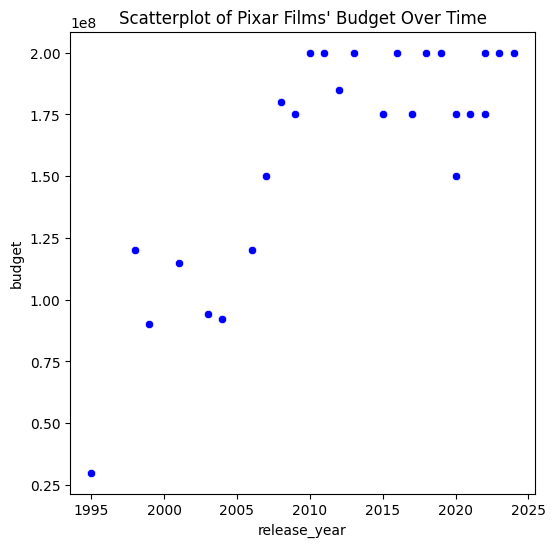

In [47]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Pixar Films' Budget Over Time")
sns.scatterplot(data=pixar_films_box_office, x='release_year', y='budget', color='blue')
plt.show()

From the above plot, it can be seen that the first Pixar movies have significantly lower budgets than later ones. Eventually, from 2007 onwards (starting with Ratatouille), the budgets stayed more stable from $150m to $200m. Therefore, in suggesting the ideal budget for producing a new Pixar films, only the films from 2007 will be observed so that everything becomes more realistic with current prices and technologies.

We will divide the budget into two ranges, $150 <= b <= $175m and $175m < b <= $200m, where b represents the budget for producing each film, with each range accounting for approximately half of the films produced since 2007.

In [48]:
pixar_films_box_office_modern = pixar_films_box_office[pixar_films_box_office['release_year'] >= 2007]

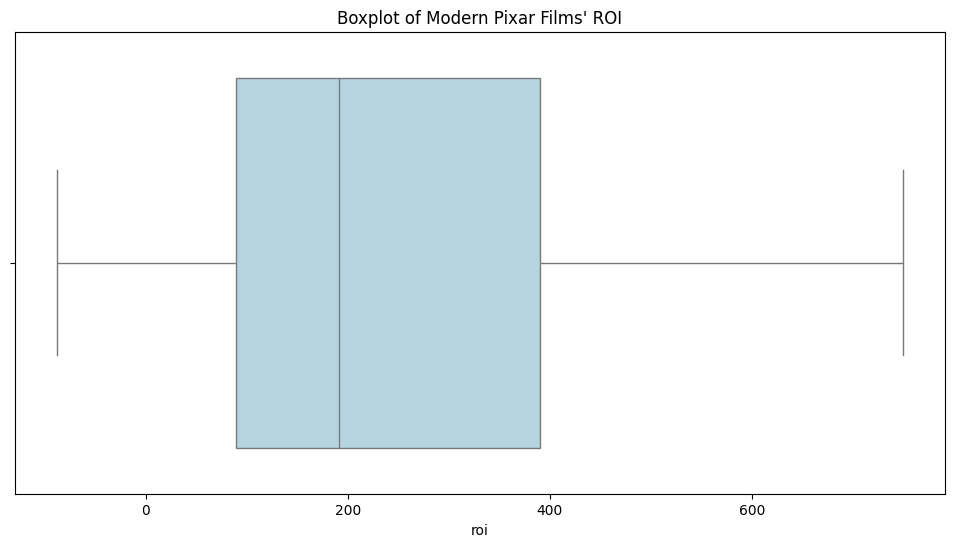

In [49]:
plt.figure(figsize=(12,6))
plt.title("Boxplot of Modern Pixar Films' ROI")
sns.boxplot(data=pixar_films_box_office_modern, x='roi', color='lightblue')
plt.show()

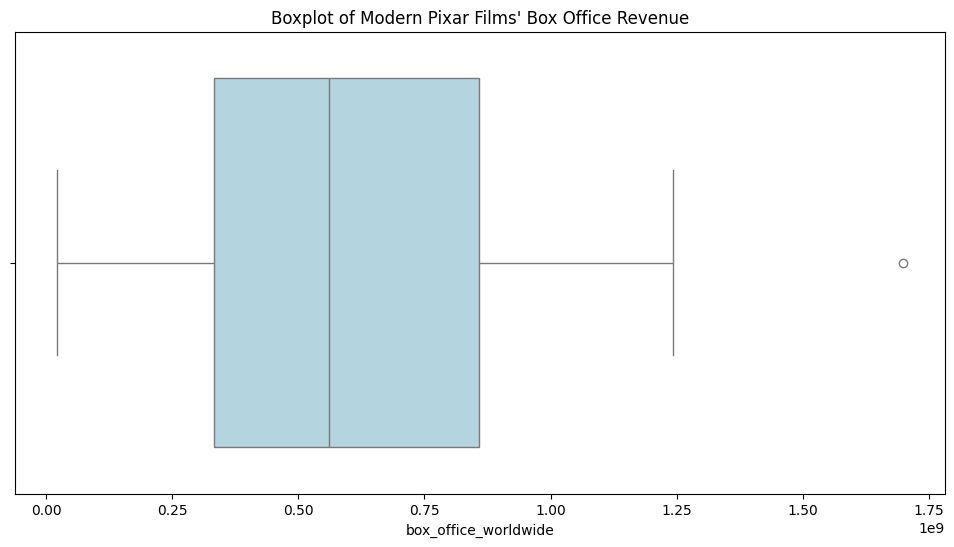

In [50]:
plt.figure(figsize=(12,6))
plt.title("Boxplot of Modern Pixar Films' Box Office Revenue")
sns.boxplot(data=pixar_films_box_office_modern, x='box_office_worldwide', color='lightblue')
plt.show()

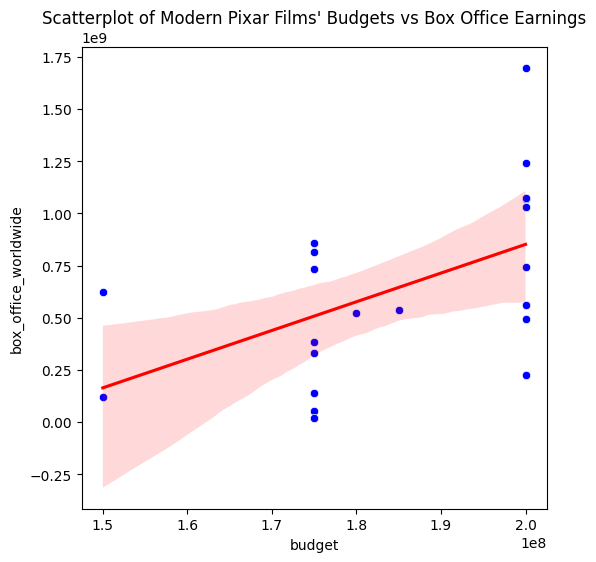

In [51]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Modern Pixar Films' Budgets vs Box Office Earnings")
sns.scatterplot(data=pixar_films_box_office_modern, x='budget', y='box_office_worldwide', color='blue')
sns.regplot(data=pixar_films_box_office_modern, x='budget', y='box_office_worldwide', scatter=False, color='red')
plt.show()

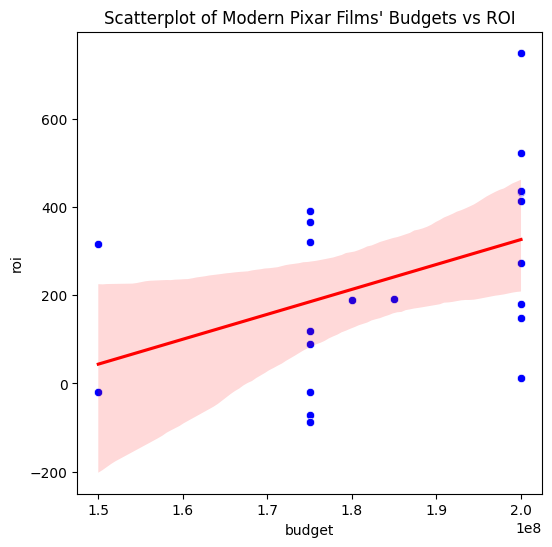

In [52]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Modern Pixar Films' Budgets vs ROI")
sns.scatterplot(data=pixar_films_box_office_modern, x='budget', y='roi', color='blue')
sns.regplot(data=pixar_films_box_office_modern, x='budget', y='roi', scatter=False, color='red')
plt.show()

In [53]:
pixar_films_box_office_modern[['budget', 'box_office_worldwide']].corr()

,budget,box_office_worldwide
budget,1.000000,0.517382
box_office_worldwide,0.517382,1.000000


In [54]:
pixar_films_box_office_modern[['budget', 'roi']].corr()

,budget,roi
budget,1.000000,0.423367
roi,0.423367,1.000000


In [55]:
pixar_films_box_office_modern['budget_group'] = pixar_films_box_office_modern['budget'].apply(lambda x: 'Low' if x <= 175000000 else 'High')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\3955279449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixar_films_box_office_modern['budget_group'] = pixar_films_box_office_modern['budget'].apply(lambda x: 'Low' if x <= 175000000 else 'High')


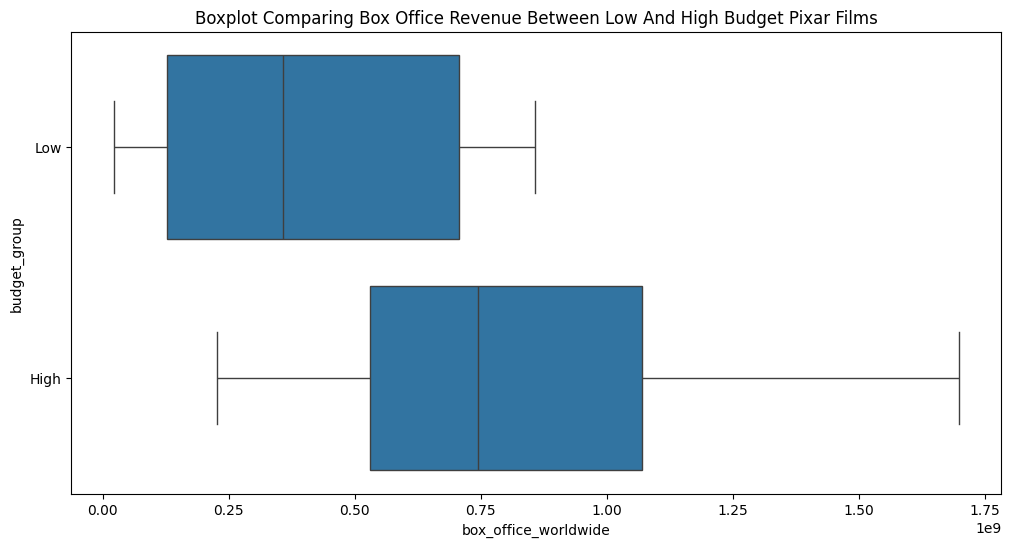

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pixar_films_box_office_modern, x='box_office_worldwide', y='budget_group')
plt.title('Boxplot Comparing Box Office Revenue Between Low And High Budget Pixar Films')
plt.show()

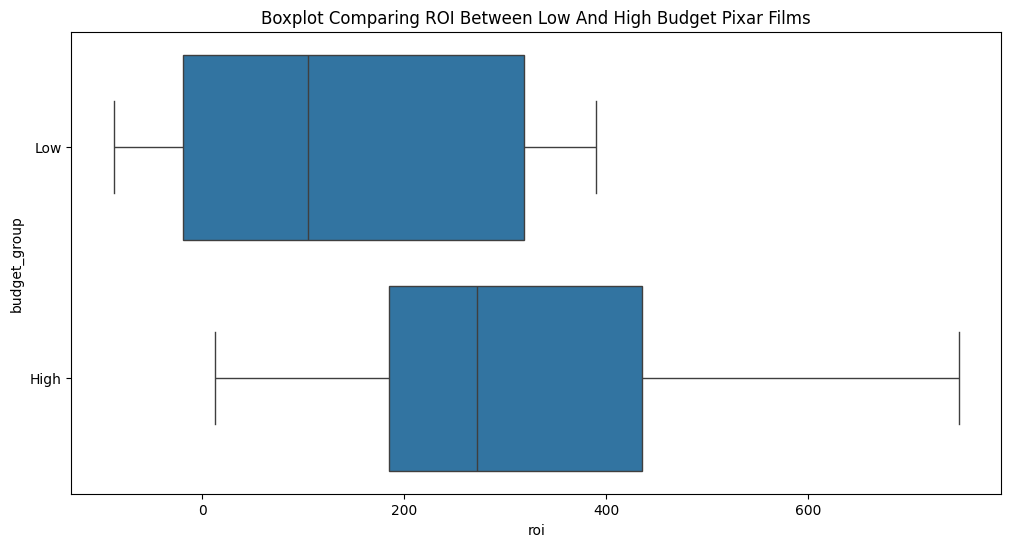

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pixar_films_box_office_modern, x='roi', y='budget_group')
plt.title('Boxplot Comparing ROI Between Low And High Budget Pixar Films')
plt.show()

In [58]:
pixar_films_box_office_modern[pixar_films_box_office_modern['budget_group'] == 'Low']['box_office_worldwide'].mean()

408398543.9

In [59]:
pixar_films_box_office_modern[pixar_films_box_office_modern['budget_group'] == 'Low']['roi'].mean()

140.47183432380953

In [60]:
pixar_films_box_office_modern[pixar_films_box_office_modern['budget_group'] == 'High']['box_office_worldwide'].mean()

836031664.2727273

In [61]:
pixar_films_box_office_modern[pixar_films_box_office_modern['budget_group'] == 'High']['roi'].mean()

322.6351449140049

In [62]:
u_stat_bo, p_val_bo_u = mannwhitneyu(
    pixar_films_box_office_modern.loc[pixar_films_box_office_modern['budget_group']=='High', 'box_office_worldwide'],
    pixar_films_box_office_modern.loc[pixar_films_box_office_modern['budget_group']=='Low', 'box_office_worldwide'],
    alternative='greater'
)

In [63]:
u_stat_bo

86.0

In [64]:
p_val_bo_u

0.015866996878448274

In [65]:
u_stat_roi, p_val_roi_u = mannwhitneyu(
    pixar_films_box_office_modern.loc[pixar_films_box_office_modern['budget_group']=='High', 'roi'],
    pixar_films_box_office_modern.loc[pixar_films_box_office_modern['budget_group']=='Low', 'roi'],
    alternative='greater'
)

In [66]:
u_stat_roi

84.0

In [67]:
p_val_roi_u

0.022379647287786138

Eventually, despite higher budget required for production, such films eventually gained higher box office revenue and return on investment. Therefore, a higher budget (higher than $175m but no more than $200m) is ideal for Pixar in producing films.

## Examine Awards Achieved By Pixar Films

In [68]:
academy_status_values = academy['status'].drop_duplicates()
academy_status_values

0     Award not yet introduced
1                    Nominated
2                   Ineligible
5      Won Special Achievement
15                         Won
Name: status, dtype: object

In [69]:
academy_won = academy[(academy['status'] == "Won Special Achievement") | (academy['status'] == "Won")]

In [70]:
academy_won

,film,award_type,status
5,Toy Story,Other,Won Special Achievement
15,"Monsters, Inc.",Original Song,Won
17,Finding Nemo,Animated Feature,Won
22,The Incredibles,Animated Feature,Won
25,The Incredibles,Sound Editing,Won
30,Ratatouille,Animated Feature,Won
36,WALL-E,Animated Feature,Won
44,Up,Animated Feature,Won
47,Up,Original Score,Won
50,Toy Story 3,Animated Feature,Won


In [71]:
all_films = academy['film'].unique()
awards_won_counts = academy_won['film'].value_counts()
awards_won_counts_df = pd.Series(awards_won_counts).reindex(all_films, fill_value=0)

In [72]:
awards_won_counts_df = awards_won_counts_df.reset_index()
awards_won_counts_df.columns = ['film', 'num_awards_won']

In [73]:
awards_won_counts_df_sorted = awards_won_counts_df.sort_values(by='num_awards_won', ascending=False)

In [74]:
awards_won_counts_df_sorted.head(5)

,film,num_awards_won
9,Up,2
22,Soul,2
18,Coco,2
5,The Incredibles,2
10,Toy Story 3,2


## Comparing Financial Success vs Academy Awards Won

In [76]:
academy_box_office = pd.merge(awards_won_counts_df, box_office, on='film')

In [77]:
academy_box_office["won_awards"] = academy_box_office["num_awards_won"] > 0

In [ ]:
academy_box_office.head()

,film,num_awards_won,budget,box_office_us_canada,box_office_other,box_office_worldwide,roi,won_awards
0,Toy Story,1,30000000.0,223225679,171210907,394436586,1214.788620,True
1,A Bug's Life,0,120000000.0,162798565,200460294,363258859,202.715716,False
2,Toy Story 2,0,90000000.0,245852179,265506097,511358276,468.175862,False
3,"Monsters, Inc.",1,115000000.0,255873250,272900000,528773250,359.802826,True
4,Finding Nemo,1,94000000.0,339714978,531300000,871014978,826.611679,True
5,The Incredibles,2,92000000.0,261441092,370001000,631442092,586.350100,True
6,Cars,0,120000000.0,244082982,217900167,461983149,284.985957,False
7,Ratatouille,1,150000000.0,206445654,417280431,623726085,315.817390,True
8,WALL-E,1,180000000.0,223808164,297503696,521311860,189.617700,True
9,Up,2,175000000.0,293004164,442094918,735099082,320.056618,True


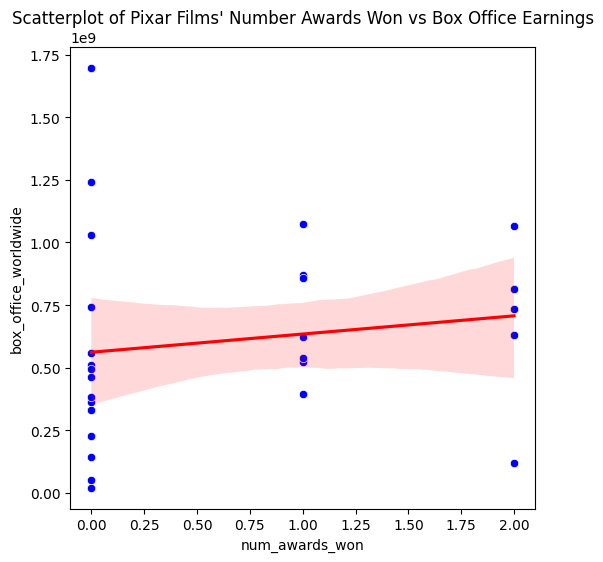

In [79]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Pixar Films' Number Awards Won vs Box Office Earnings")
sns.scatterplot(data=academy_box_office, x='num_awards_won', y='box_office_worldwide', color='blue')
sns.regplot(data=academy_box_office, x='num_awards_won', y='box_office_worldwide', scatter=False, color='red')
plt.show()

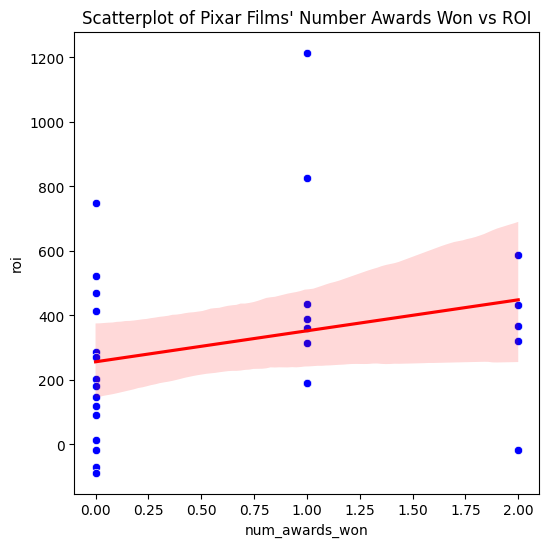

In [80]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Pixar Films' Number Awards Won vs ROI")
sns.scatterplot(data=academy_box_office, x='num_awards_won', y='roi', color='blue')
sns.regplot(data=academy_box_office, x='num_awards_won', y='roi', scatter=False, color='red')
plt.show()

In [81]:
academy_box_office[['num_awards_won', 'box_office_worldwide']].corr()

,num_awards_won,box_office_worldwide
num_awards_won,1.000000,0.148083
box_office_worldwide,0.148083,1.000000


In [82]:
academy_box_office[['num_awards_won', 'roi']].corr()

,num_awards_won,roi
num_awards_won,1.000000,0.259377
roi,0.259377,1.000000


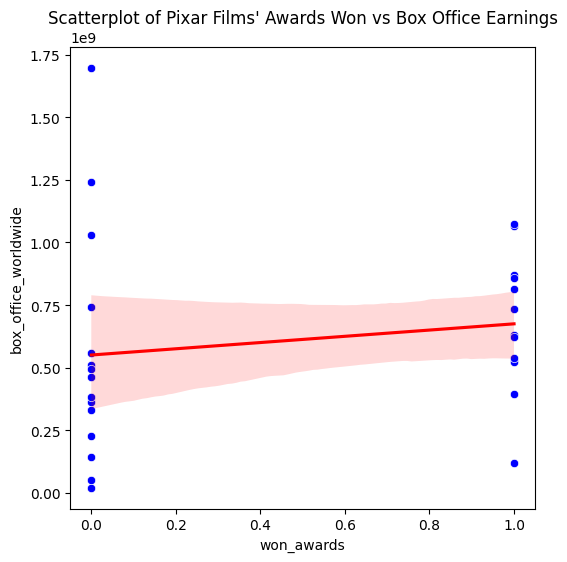

In [83]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Pixar Films' Awards Won vs Box Office Earnings")
sns.scatterplot(data=academy_box_office, x='won_awards', y='box_office_worldwide', color='blue')
sns.regplot(data=academy_box_office, x='won_awards', y='box_office_worldwide', scatter=False, color='red')
plt.show()

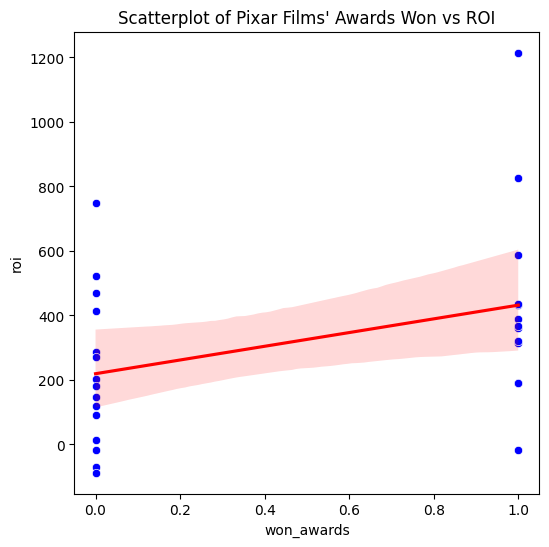

In [84]:
plt.figure(figsize=(6,6))
plt.title("Scatterplot of Pixar Films' Awards Won vs ROI")
sns.scatterplot(data=academy_box_office, x='won_awards', y='roi', color='blue')
sns.regplot(data=academy_box_office, x='won_awards', y='roi', scatter=False, color='red')
plt.show()

In [85]:
academy_box_office[['won_awards', 'box_office_worldwide']].corr()

,won_awards,box_office_worldwide
won_awards,1.000000,0.165171
box_office_worldwide,0.165171,1.000000


In [86]:
academy_box_office[['won_awards', 'roi']].corr()

,won_awards,roi
won_awards,1.000000,0.373669
roi,0.373669,1.000000


In [87]:
academy_box_office[academy_box_office['won_awards'] == False]['box_office_worldwide'].mean()

550886217.9333333

In [88]:
academy_box_office[academy_box_office['won_awards'] == False]['roi'].mean()

219.04828777989414

In [89]:
academy_box_office[academy_box_office['won_awards'] == True]['box_office_worldwide'].mean()

675331359.0

In [90]:
academy_box_office[academy_box_office['won_awards'] == True]['roi'].mean()

431.6470293045886

In [91]:
u_stat_bo, p_val_bo_u = mannwhitneyu(
    academy_box_office.loc[academy_box_office['won_awards']==1, 'box_office_worldwide'],
    academy_box_office.loc[academy_box_office['won_awards']==0, 'box_office_worldwide'],
    alternative='greater'
)

In [92]:
u_stat_bo

134.0

In [93]:
p_val_bo_u

0.04862318085168094

In [94]:
u_stat_roi, p_val_roi_u = mannwhitneyu(
    academy_box_office.loc[academy_box_office['won_awards']==1, 'roi'],
    academy_box_office.loc[academy_box_office['won_awards']==0, 'roi'],
    alternative='greater'
)

In [95]:
u_stat_roi

142.0

In [96]:
p_val_roi_u

0.02133759202454657

## Genre Over Time Analysis

In [97]:
genres_main = genres[genres["category"] == "Genre"]

In [98]:
genres_main_dummies = pd.get_dummies(genres_main['value'])

genres_main_dummies['film'] = genres_main['film']

genres_main_matrix = genres_main_dummies.groupby('film').max().reset_index()

genres_main_matrix

,film,Action,Adventure,Animation,Comedy,Drama,Family
0,A Bug's Life,False,True,True,True,False,False
1,Brave,True,True,True,False,False,False
2,Cars,False,True,True,True,False,False
3,Cars 2,False,True,True,True,False,False
4,Cars 3,False,True,True,True,False,False
5,Coco,False,True,True,False,True,False
6,Elemental,False,True,True,True,False,False
7,Finding Dory,False,True,True,True,False,False
8,Finding Nemo,False,True,True,True,False,False
9,Incredibles 2,True,True,True,False,False,False


In [99]:
main_genre_columns = genres_main_matrix.columns.drop('film')
main_genre_columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Family'], dtype='object')

In [100]:
for main_genre_column in main_genre_columns:
    print(f"Number of {main_genre_column} films: {genres_main_matrix[main_genre_column].sum()}")
    if genres_main_matrix[main_genre_column].sum() == 28:
        genres_main_matrix = genres_main_matrix.drop(main_genre_column, axis=1)

Number of Action films: 5
Number of Adventure films: 28
Number of Animation films: 28
Number of Comedy films: 21
Number of Drama films: 1
Number of Family films: 1


In [101]:
genres_main_matrix_decade = genres_main_matrix.merge(pixar_films[['film', 'release_decade']], on='film', how='inner')

In [102]:
genres_main_matrix_decade

,film,Action,Comedy,Drama,Family,release_decade
0,A Bug's Life,False,True,False,False,1990
1,Brave,True,False,False,False,2010
2,Cars,False,True,False,False,2000
3,Cars 2,False,True,False,False,2010
4,Cars 3,False,True,False,False,2010
5,Coco,False,False,True,False,2010
6,Elemental,False,True,False,False,2020
7,Finding Dory,False,True,False,False,2010
8,Finding Nemo,False,True,False,False,2000
9,Incredibles 2,True,False,False,False,2010


In [103]:
main_genre_columns_unique = genres_main_matrix_decade.columns

main_genre_columns_unique = main_genre_columns_unique.drop(['film', 'release_decade'])

main_genre_columns_unique

Index(['Action', 'Comedy', 'Drama', 'Family'], dtype='object')

In [104]:
genres_main_decade_count = genres_main_matrix_decade.groupby('release_decade')[main_genre_columns_unique].sum()

In [105]:
genres_main_decade_count

,Action,Comedy,Drama,Family
release_decade,,,,
1990,0,3,0,0
2000,1,5,0,1
2010,3,7,1,0
2020,1,6,0,0


In [106]:
genres_main_decade_count.columns

Index(['Action', 'Comedy', 'Drama', 'Family'], dtype='object')

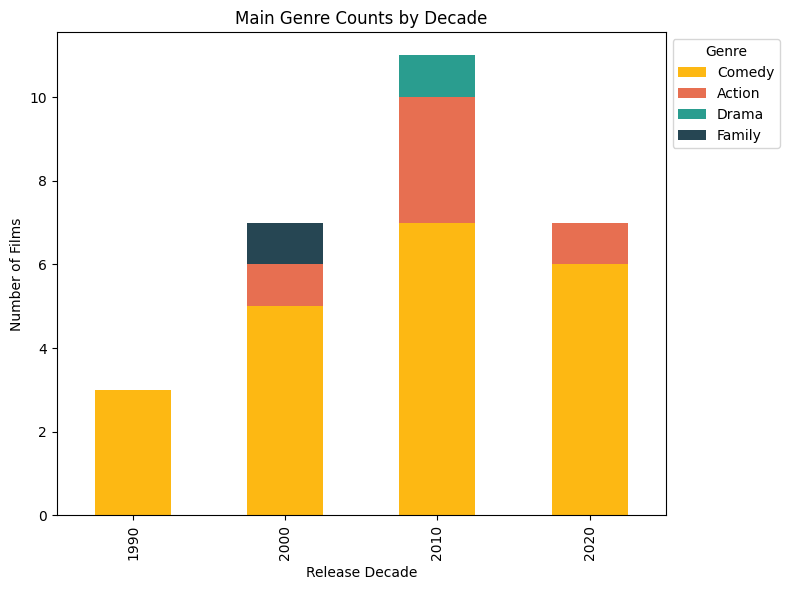

In [107]:
genre_order = ['Comedy', 'Action', 'Drama', 'Family']

genres_main_decade_count = genres_main_decade_count[genre_order]

genres_main_decade_count.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=['#FDB813', '#E76F51', '#2A9D8F', '#264653']  
)

plt.title('Main Genre Counts by Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Films')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [108]:
genres_sub = genres[genres["category"] == "Subgenre"]

In [109]:
genres_sub_dummies = pd.get_dummies(genres_sub['value'])

genres_sub_dummies['film'] = genres_sub['film']

genres_sub_matrix = genres_sub_dummies.groupby('film').max().reset_index()

genres_sub_matrix

,film,Adventure Epic,Animal Adventure,Artificial Intelligence,Buddy Comedy,Car Action,Coming-of-Age,Computer Animation,Crime,Dinosaur Adventure,...,Sport,Spy,Superhero,Supernatural Fantasy,Sword & Sorcery,Teen Adventure,Teen Comedy,Teen Drama,Time Travel,Urban Adventure
0,A Bug's Life,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Brave,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,True,False,False,False,False
2,Cars,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Cars 2,False,False,False,False,True,False,True,True,False,...,True,True,False,False,False,False,False,False,False,False
4,Cars 3,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
5,Coco,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
6,Elemental,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
7,Finding Dory,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Finding Nemo,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Incredibles 2,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [110]:
sub_genre_columns = genres_sub_matrix.columns.drop('film')
sub_genre_columns

Index(['Adventure Epic', 'Animal Adventure', 'Artificial Intelligence',
       'Buddy Comedy', 'Car Action', 'Coming-of-Age', 'Computer Animation',
       'Crime', 'Dinosaur Adventure', 'Dystopian Sci-Fi', 'Fairy Tale',
       'Fantasy', 'Fantasy Epic', 'Globetrotting Adventure', 'Motorsport',
       'Music', 'Mystery', 'Quest', 'Road Trip', 'Romance', 'Sci-Fi',
       'Sea Adventure', 'Space Sci-Fi', 'Sport', 'Spy', 'Superhero',
       'Supernatural Fantasy', 'Sword & Sorcery', 'Teen Adventure',
       'Teen Comedy', 'Teen Drama', 'Time Travel', 'Urban Adventure'],
      dtype='object')

In [111]:
for sub_genre_column in sub_genre_columns:
    print(f"Number of {sub_genre_column} films: {genres_sub_matrix[sub_genre_column].sum()}")
    if genres_sub_matrix[sub_genre_column].sum() == 28:
        genres_sub_matrix = genres_sub_matrix.drop(sub_genre_column, axis=1)

Number of Adventure Epic films: 1
Number of Animal Adventure films: 5
Number of Artificial Intelligence films: 1
Number of Buddy Comedy films: 4
Number of Car Action films: 2
Number of Coming-of-Age films: 6
Number of Computer Animation films: 28
Number of Crime films: 1
Number of Dinosaur Adventure films: 1
Number of Dystopian Sci-Fi films: 1
Number of Fairy Tale films: 2
Number of Fantasy films: 14
Number of Fantasy Epic films: 1
Number of Globetrotting Adventure films: 1
Number of Motorsport films: 3
Number of Music films: 3
Number of Mystery films: 1
Number of Quest films: 6
Number of Road Trip films: 1
Number of Romance films: 1
Number of Sci-Fi films: 3
Number of Sea Adventure films: 3
Number of Space Sci-Fi films: 2
Number of Sport films: 3
Number of Spy films: 1
Number of Superhero films: 3
Number of Supernatural Fantasy films: 7
Number of Sword & Sorcery films: 2
Number of Teen Adventure films: 1
Number of Teen Comedy films: 2
Number of Teen Drama films: 1
Number of Time Trave

In [112]:
genres_sub_matrix_decade = genres_sub_matrix.merge(pixar_films[['film', 'release_decade']], on='film', how='inner')

In [113]:
genres_sub_matrix_decade

,film,Adventure Epic,Animal Adventure,Artificial Intelligence,Buddy Comedy,Car Action,Coming-of-Age,Crime,Dinosaur Adventure,Dystopian Sci-Fi,...,Spy,Superhero,Supernatural Fantasy,Sword & Sorcery,Teen Adventure,Teen Comedy,Teen Drama,Time Travel,Urban Adventure,release_decade
0,A Bug's Life,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1990
1,Brave,False,False,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,2010
2,Cars,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2000
3,Cars 2,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,2010
4,Cars 3,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2010
5,Coco,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,2010
6,Elemental,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2020
7,Finding Dory,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2010
8,Finding Nemo,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2000
9,Incredibles 2,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,2010


In [114]:
sub_genre_columns_unique = genres_sub_matrix_decade.columns

sub_genre_columns_unique = sub_genre_columns_unique.drop(['film', 'release_decade'])

sub_genre_columns_unique

Index(['Adventure Epic', 'Animal Adventure', 'Artificial Intelligence',
       'Buddy Comedy', 'Car Action', 'Coming-of-Age', 'Crime',
       'Dinosaur Adventure', 'Dystopian Sci-Fi', 'Fairy Tale', 'Fantasy',
       'Fantasy Epic', 'Globetrotting Adventure', 'Motorsport', 'Music',
       'Mystery', 'Quest', 'Road Trip', 'Romance', 'Sci-Fi', 'Sea Adventure',
       'Space Sci-Fi', 'Sport', 'Spy', 'Superhero', 'Supernatural Fantasy',
       'Sword & Sorcery', 'Teen Adventure', 'Teen Comedy', 'Teen Drama',
       'Time Travel', 'Urban Adventure'],
      dtype='object')

In [115]:
genres_sub_decade_count = genres_sub_matrix_decade.groupby('release_decade')[sub_genre_columns_unique].sum()

In [116]:
genres_sub_decade_count

,Adventure Epic,Animal Adventure,Artificial Intelligence,Buddy Comedy,Car Action,Coming-of-Age,Crime,Dinosaur Adventure,Dystopian Sci-Fi,Fairy Tale,...,Sport,Spy,Superhero,Supernatural Fantasy,Sword & Sorcery,Teen Adventure,Teen Comedy,Teen Drama,Time Travel,Urban Adventure
release_decade,,,,,,,,,,,,,,,,,,,,,
1990,0,1,0,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
2000,1,2,1,2,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,2
2010,0,2,0,1,2,2,1,1,0,1,...,2,1,1,3,1,1,0,0,0,3
2020,0,0,0,0,0,3,0,0,0,1,...,0,0,1,1,1,0,2,1,1,1


In [117]:
sorted_columns = genres_sub_decade_count.sum(axis=0).sort_values(ascending=False).index

genres_sub_decade_count = genres_sub_decade_count[sorted_columns]

In [118]:
genres_sub_decade_count

,Fantasy,Urban Adventure,Supernatural Fantasy,Coming-of-Age,Quest,Animal Adventure,Buddy Comedy,Music,Motorsport,Sea Adventure,...,Time Travel,Romance,Crime,Road Trip,Mystery,Globetrotting Adventure,Fantasy Epic,Dystopian Sci-Fi,Dinosaur Adventure,Adventure Epic
release_decade,,,,,,,,,,,,,,,,,,,,,
1990,2,2,2,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,2,2,1,1,1,2,2,0,1,1,...,0,0,0,0,0,1,0,1,0,1
2010,6,3,3,2,1,2,1,1,2,1,...,0,0,1,1,1,0,0,0,1,0
2020,4,1,1,3,2,0,0,2,0,1,...,1,1,0,0,0,0,1,0,0,0


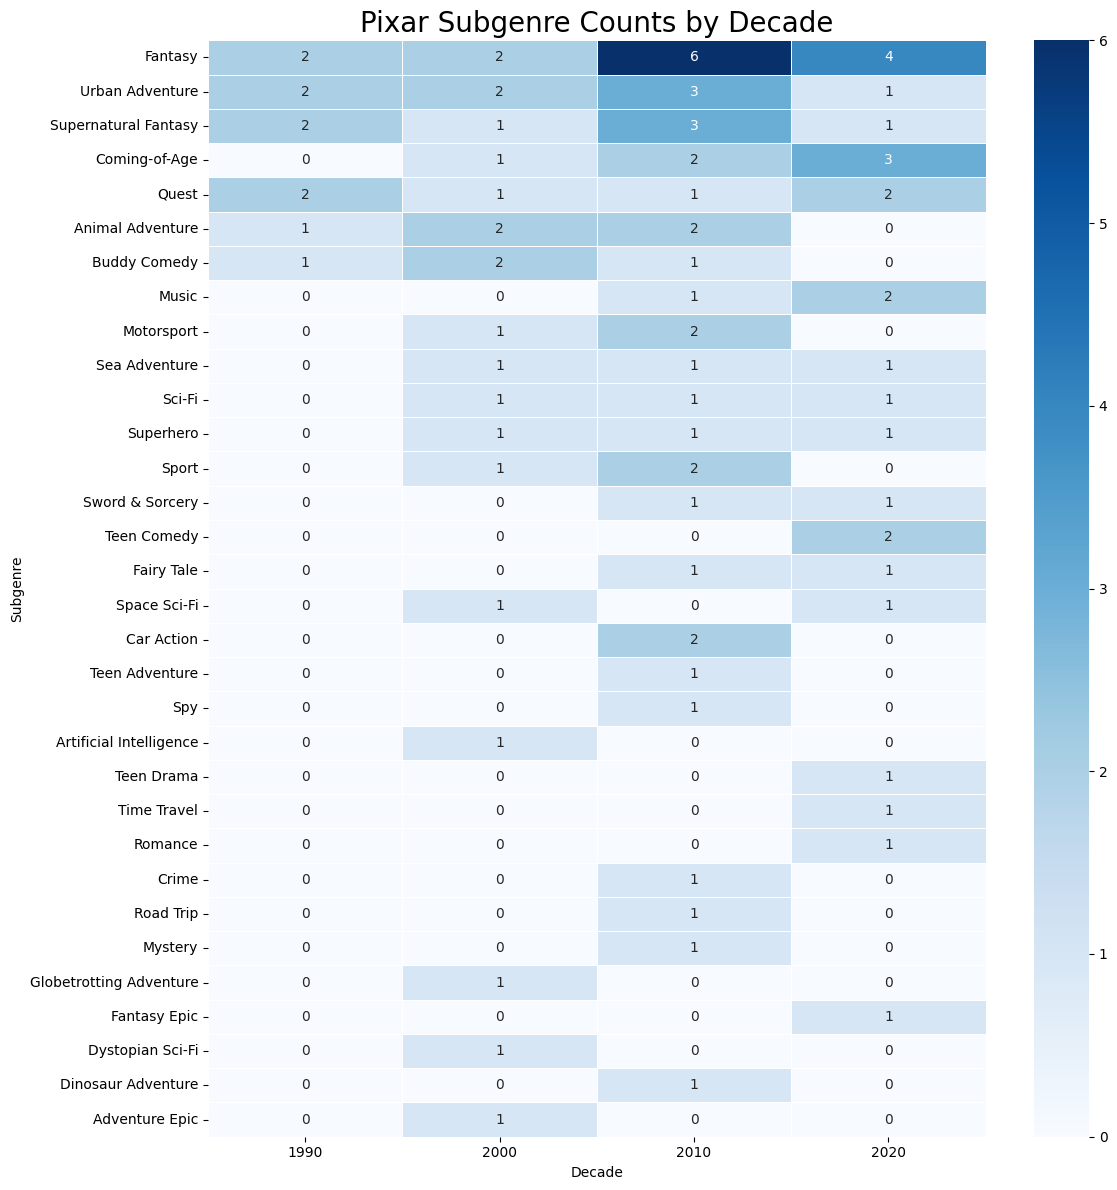

In [119]:
genres_sub_decade_count_heatmap = genres_sub_decade_count.T

plt.figure(figsize=(12, 12))  
sns.heatmap(genres_sub_decade_count_heatmap, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title("Pixar Subgenre Counts by Decade", fontsize=20)
plt.xlabel("Decade")
plt.ylabel("Subgenre")

plt.tight_layout()
plt.show()


In [120]:
genres_sub_matrix_shorten = genres_sub_matrix
main_sub_genres = ['Fantasy', 'Urban Adventure', 'Supernatural Fantasy', 'Coming-of-Age', 'Quest', 'Animal Adventure', 'Buddy Comedy']
other_sub_genres = [col for col in genres_sub_matrix.columns if col not in main_sub_genres]
other_sub_genres.remove('film')
genres_sub_matrix_shorten['Other'] = genres_sub_matrix_shorten[other_sub_genres].max(axis=1)
genres_sub_matrix_shorten.drop(columns=other_sub_genres, inplace=True)

In [121]:
genres_sub_matrix_shorten.head()

,film,Animal Adventure,Buddy Comedy,Coming-of-Age,Fantasy,Quest,Supernatural Fantasy,Urban Adventure,Other
0,A Bug's Life,True,False,False,False,True,False,False,False
1,Brave,False,False,True,False,True,False,False,True
2,Cars,False,False,False,False,False,False,False,True
3,Cars 2,False,False,False,False,False,False,False,True
4,Cars 3,False,False,False,False,False,False,False,True


## Personnel Analysis

In [122]:
person_roles = pixar_people['role_type'].unique()

In [123]:
person_roles

array(['Director', 'Musician', 'Producer', 'Screenwriter', 'Storywriter',
       'Co-director'], dtype=object)

In [124]:
pixar_people['role_type'] = pixar_people['role_type'].replace('Co-director', 'Director')

In [125]:
top_people = pixar_people.groupby('name').film.nunique().sort_values(ascending=False)

In [126]:
top_people_df = top_people.reset_index(name='film_count')

In [127]:
top_people_df.head(5)

,name,film_count
0,Randy Newman,9
1,Andrew Stanton,9
2,Michael Giacchino,8
3,Pete Docter,7
4,John Lasseter,7


In [128]:
role_counts = pixar_people.groupby(['role_type','name']).film.nunique()

In [129]:
role_counts_df = role_counts.reset_index(name='film_count')
role_counts_df = role_counts_df.sort_values(by='film_count', ascending=False)

In [130]:
role_counts_df.head(15)

,role_type,name,film_count
31,Musician,Randy Newman,9
29,Musician,Michael Giacchino,8
56,Screenwriter,Andrew Stanton,8
100,Storywriter,Andrew Stanton,8
139,Storywriter,Pete Docter,7
124,Storywriter,John Lasseter,7
14,Director,John Lasseter,5
37,Producer,Darla K. Anderson,5
18,Director,Lee Unkrich,5
1,Director,Andrew Stanton,4


### Personnel Analysis By Decade

In [131]:
pixar_people_decade = pixar_people.merge(pixar_films[['film', 'release_decade']], on='film', how='inner')

In [132]:
pixar_people_decade.head()

,film,role_type,name,release_decade
0,Toy Story,Director,John Lasseter,1990
1,Toy Story,Musician,Randy Newman,1990
2,Toy Story,Producer,Bonnie Arnold,1990
3,Toy Story,Producer,Ralph Guggenheim,1990
4,Toy Story,Screenwriter,Joel Cohen,1990


In [133]:
person_decade_counts = pixar_people_decade.drop_duplicates(['film', 'name']).groupby(['name', 'release_decade'])['film'].nunique().unstack(fill_value=0)

In [134]:
person_decade_counts['total'] = person_decade_counts.sum(axis=1)
person_decade_counts = person_decade_counts.sort_values('total', ascending=False)

In [135]:
person_decade_counts.head(15)

release_decade,1990,2000,2010,2020,total
name,,,,,
Randy Newman,3,2,4,0,9
Andrew Stanton,3,3,3,0,9
Michael Giacchino,0,3,4,1,8
Pete Docter,2,3,1,1,7
John Lasseter,3,1,3,0,7
Darla K. Anderson,1,2,2,0,5
Lee Unkrich,1,2,2,0,5
Bob Peterson,0,2,2,0,4
Thomas Newman,0,2,1,1,4


In [136]:
top_1990 = person_decade_counts[1990].sort_values(ascending=False)
top_1990_df = top_1990.reset_index()
top_1990_df.columns = ['name', 'film_count']
top_1990_df = top_1990_df[top_1990_df['film_count'] > 0]

In [137]:
top_1990_df[top_1990_df['film_count'] > 1]

,name,film_count
0,Randy Newman,3
1,John Lasseter,3
2,Andrew Stanton,3
3,Pete Docter,2
4,Joe Ranft,2


In [138]:
top_2000 = person_decade_counts[2000].sort_values(ascending=False)
top_2000_df = top_2000.reset_index()
top_2000_df.columns = ['name', 'film_count']
top_2000_df = top_2000_df[top_2000_df['film_count'] > 0]

In [139]:
top_2000_df[top_2000_df['film_count'] > 1]

,name,film_count
0,Michael Giacchino,3
1,Pete Docter,3
2,Andrew Stanton,3
3,Randy Newman,2
4,Brad Bird,2
5,Darla K. Anderson,2
6,Lee Unkrich,2
7,Bob Peterson,2
8,Thomas Newman,2


In [140]:
top_2010 = person_decade_counts[2010].sort_values(ascending=False)
top_2010_df = top_2010.reset_index()
top_2010_df.columns = ['name', 'film_count']
top_2010_df = top_2010_df[top_2010_df['film_count'] > 0]

In [141]:
top_2010_df[top_2010_df['film_count'] > 1]

,name,film_count
0,Randy Newman,4
1,Michael Giacchino,4
2,Andrew Stanton,3
3,John Lasseter,3
4,Ben Queen,2
5,Meg LeFauve,2
6,Denise Ream,2
7,Jonas Rivera,2
8,Josh Cooley,2
9,Bob Peterson,2


In [142]:
top_2020 = person_decade_counts[2020].sort_values(ascending=False)
top_2020_df = top_2020.reset_index()
top_2020_df.columns = ['name', 'film_count']
top_2020_df = top_2020_df[top_2020_df['film_count'] > 0]

In [143]:
top_2020_df[top_2020_df['film_count'] > 1]

,name,film_count
0,Jason Headley,2


### Personnel Analysis By Academy Awards Won

In [144]:
pixar_people_awards_won = pixar_people.merge(awards_won_counts_df, on='film', how='inner')

In [145]:
pixar_people_awards_won = pixar_people_awards_won[pixar_people_awards_won['num_awards_won'] > 0]

In [146]:
pixar_people_awards_won.head()

,film,role_type,name,num_awards_won
0,Toy Story,Director,John Lasseter,1
1,Toy Story,Musician,Randy Newman,1
2,Toy Story,Producer,Bonnie Arnold,1
3,Toy Story,Producer,Ralph Guggenheim,1
4,Toy Story,Screenwriter,Joel Cohen,1


In [147]:
unique_awards = pixar_people_awards_won.drop_duplicates(subset=['film', 'name'])
awards_won_by_person = unique_awards.groupby('name')['num_awards_won'].sum().reset_index()
awards_won_by_person = awards_won_by_person.sort_values(by='num_awards_won', ascending=False)

In [148]:
awards_won_by_person.head(10)

,name,num_awards_won
38,Pete Docter,8
36,Michael Giacchino,8
2,Andrew Stanton,7
29,Lee Unkrich,6
41,Randy Newman,5
10,Darla K. Anderson,5
23,John Lasseter,4
25,Jonas Rivera,4
6,Brad Bird,3
4,Bob Peterson,3


In [149]:
awards_won_by_person_role = pixar_people_awards_won.groupby(['name', 'role_type'])['num_awards_won'].sum().reset_index()
awards_won_by_person_role = awards_won_by_person_role.sort_values(by='num_awards_won', ascending=False)

In [150]:
awards_won_by_person_role.head(10)

,name,role_type,num_awards_won
56,Michael Giacchino,Musician,8
61,Pete Docter,Storywriter,8
43,Lee Unkrich,Director,6
59,Pete Docter,Director,6
6,Andrew Stanton,Storywriter,6
64,Randy Newman,Musician,5
18,Darla K. Anderson,Producer,5
60,Pete Docter,Screenwriter,5
5,Andrew Stanton,Screenwriter,5
44,Lee Unkrich,Storywriter,4


## Filter Out Most Common Roles For Model Fitting

In [151]:
filtered_role_counts_df = role_counts_df[role_counts_df['film_count'] >= 4]

filtered_role_counts_df

,role_type,name,film_count
31,Musician,Randy Newman,9
29,Musician,Michael Giacchino,8
56,Screenwriter,Andrew Stanton,8
100,Storywriter,Andrew Stanton,8
139,Storywriter,Pete Docter,7
124,Storywriter,John Lasseter,7
14,Director,John Lasseter,5
37,Producer,Darla K. Anderson,5
18,Director,Lee Unkrich,5
1,Director,Andrew Stanton,4


In [152]:
filtered_people = pixar_people.merge(filtered_role_counts_df[['role_type', 'name']], on=['role_type', 'name'], how='inner')

In [153]:
filtered_people

,film,role_type,name
0,Toy Story,Director,John Lasseter
1,Toy Story,Musician,Randy Newman
2,Toy Story,Screenwriter,Andrew Stanton
3,Toy Story,Storywriter,Pete Docter
4,Toy Story,Storywriter,John Lasseter
...,...,...,...
69,Toy Story 4,Storywriter,Andrew Stanton
70,Soul,Director,Pete Docter
71,Soul,Storywriter,Pete Docter
72,Lightyear,Musician,Michael Giacchino


In [154]:
filtered_people['person_role'] = filtered_people['name'] + '_' + filtered_people['role_type']

In [155]:
filtered_people_dummies = pd.get_dummies(filtered_people['person_role'])

filtered_people_dummies['film'] = filtered_people['film']

filtered_people_matrix = filtered_people_dummies.groupby('film').max().reset_index()

filtered_people_matrix

,film,Andrew Stanton_Director,Andrew Stanton_Screenwriter,Andrew Stanton_Storywriter,Darla K. Anderson_Producer,John Lasseter_Director,John Lasseter_Storywriter,Lee Unkrich_Director,Michael Giacchino_Musician,Pete Docter_Director,Pete Docter_Storywriter,Randy Newman_Musician,Thomas Newman_Musician
0,A Bug's Life,True,True,True,True,True,True,False,False,False,False,True,False
1,Cars,False,False,False,True,True,True,False,False,False,False,True,False
2,Cars 2,False,False,False,False,True,True,False,True,False,False,False,False
3,Cars 3,False,False,False,False,False,False,False,False,False,False,True,False
4,Coco,False,False,False,True,False,False,True,True,False,False,False,False
5,Elemental,False,False,False,False,False,False,False,False,False,False,False,True
6,Finding Dory,True,True,True,False,False,False,False,False,False,False,False,True
7,Finding Nemo,True,True,True,False,False,False,True,False,False,False,False,True
8,Incredibles 2,False,False,False,False,False,False,False,True,False,False,False,False
9,Inside Out,False,False,False,False,False,False,False,True,True,True,False,False


### Predict Films' Box Office Revenue

In [156]:
pixar_full = pixar_films.merge(box_office[['film', 'budget', 'box_office_worldwide']], on='film', how='inner')

In [157]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,budget,box_office_worldwide
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,30000000.0,394436586
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,120000000.0,363258859
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,90000000.0,511358276
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,115000000.0,528773250
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,94000000.0,871014978


In [158]:
pixar_full.isna().sum()

number                  0
film                    0
release_date            0
run_time                0
film_rating             0
plot                    0
release_month           0
release_quarter         0
release_year            0
release_decade          0
budget                  0
box_office_worldwide    0
dtype: int64

In [159]:
pixar_full.dtypes

number                           int64
film                            object
release_date            datetime64[ns]
run_time                         int64
film_rating                     object
plot                            object
release_month                    int32
release_quarter                  int32
release_year                     int32
release_decade                   int32
budget                         float64
box_office_worldwide             int64
dtype: object

In [160]:
pixar_full.astype({'box_office_worldwide': 'float64'}).dtypes

number                           int64
film                            object
release_date            datetime64[ns]
run_time                         int64
film_rating                     object
plot                            object
release_month                    int32
release_quarter                  int32
release_year                     int32
release_decade                   int32
budget                         float64
box_office_worldwide           float64
dtype: object

In [161]:
pixar_full['release_month_sin'] = np.sin(2 * np.pi * pixar_full['release_month'] / 12)
pixar_full['release_month_cos'] = np.cos(2 * np.pi * pixar_full['release_month'] / 12)
pixar_full['release_decade_sin'] = np.sin(2 * np.pi * pixar_full['release_decade'] / 4)
pixar_full['release_decade_cos'] = np.cos(2 * np.pi * pixar_full['release_decade'] / 4)

In [162]:
pixar_full['release_decade_1990'] = pixar_full['release_decade'] == 1990
pixar_full['release_decade_2000'] = pixar_full['release_decade'] == 2000
pixar_full['release_decade_2010'] = pixar_full['release_decade'] == 2010
pixar_full['release_decade_2020'] = pixar_full['release_decade'] == 2020

In [163]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,budget,box_office_worldwide,release_month_sin,release_month_cos,release_decade_sin,release_decade_cos,release_decade_1990,release_decade_2000,release_decade_2010,release_decade_2020
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,30000000.0,394436586,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,120000000.0,363258859,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,90000000.0,511358276,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,115000000.0,528773250,-0.5,0.866025,-3.214166e-13,1.0,False,True,False,False
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,94000000.0,871014978,0.5,-0.866025,-3.214166e-13,1.0,False,True,False,False


In [164]:
pixar_full = pixar_full.merge(public_response, on='film', how='inner')

In [165]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,...,release_decade_2000,release_decade_2010,release_decade_2020,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,...,False,False,False,100.0,96,95.0,26,3.7,8.3,1089101
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,...,False,False,False,92.0,91,78.0,23,3.7,7.2,319596
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,...,False,False,False,100.0,172,88.0,34,4.0,7.9,630573
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,...,True,False,False,96.0,199,79.0,35,4.0,8.1,1000657
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,...,True,False,False,99.0,270,90.0,38,4.0,8.2,1132877


In [166]:
pixar_full = pixar_full.merge(genres_main_matrix, on='film', how='inner')

In [167]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,...,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts,Action,Comedy,Drama,Family
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,...,96,95.0,26,3.7,8.3,1089101,False,True,False,False
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,...,91,78.0,23,3.7,7.2,319596,False,True,False,False
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,...,172,88.0,34,4.0,7.9,630573,False,True,False,False
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,...,199,79.0,35,4.0,8.1,1000657,False,True,False,False
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,...,270,90.0,38,4.0,8.2,1132877,False,True,False,False


In [168]:
pixar_full.rename(columns={'Action': 'main_genre_action', 'Comedy': 'main_genre_comedy', 'Drama': 'main_genre_drama', 'Family': 'main_genre_family'}, inplace=True)

In [169]:
pixar_full = pixar_full.merge(genres_sub_matrix_shorten, on='film', how='inner')

In [170]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,...,main_genre_drama,main_genre_family,Animal Adventure,Buddy Comedy,Coming-of-Age,Fantasy,Quest,Supernatural Fantasy,Urban Adventure,Other
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,...,False,False,False,True,False,True,False,True,True,False
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,...,False,False,True,False,False,False,True,False,False,False
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,...,False,False,False,False,False,True,True,True,True,False
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,...,False,False,False,True,False,True,False,True,True,False
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,...,False,False,True,True,False,False,True,False,False,True


In [171]:
pixar_full.rename(columns={'Animal Adventure': 'sub_genre_animal_adventure', 'Buddy Comedy': 'sub_genre_buddy_comedy', 'Coming-of-Age': 'sub_genre_coming_of_age', 'Fantasy': 'sub_genre_fantasy', 'Quest': 'sub_genre_quest', 'Supernatural Fantasy': 'sub_genre_supernatural_fantasy', 'Urban Adventure': 'sub_genre_urban_adventure', 'Other': 'sub_genre_other'}, inplace=True)

In [172]:
pixar_full = pixar_full.merge(filtered_people_matrix, on='film', how='left')

In [173]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,...,Andrew Stanton_Storywriter,Darla K. Anderson_Producer,John Lasseter_Director,John Lasseter_Storywriter,Lee Unkrich_Director,Michael Giacchino_Musician,Pete Docter_Director,Pete Docter_Storywriter,Randy Newman_Musician,Thomas Newman_Musician
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,...,True,False,True,True,False,False,False,True,True,False
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,...,True,True,True,True,False,False,False,False,True,False
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,...,True,False,True,True,True,False,False,True,True,False
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,...,False,True,False,False,True,False,True,True,True,False
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,...,True,False,False,False,True,False,False,False,False,True


In [174]:
pixar_full.isna().sum()

number                            0
film                              0
release_date                      0
run_time                          0
film_rating                       0
plot                              0
release_month                     0
release_quarter                   0
release_year                      0
release_decade                    0
budget                            0
box_office_worldwide              0
release_month_sin                 0
release_month_cos                 0
release_decade_sin                0
release_decade_cos                0
release_decade_1990               0
release_decade_2000               0
release_decade_2010               0
release_decade_2020               0
rotten_tomatoes_score             0
rotten_tomatoes_counts            0
metacritic_score                  0
metacritic_counts                 0
cinema_score                      0
imdb_score                        0
imdb_counts                       0
main_genre_action           

In [175]:
pixar_full[filtered_people_matrix.columns] = pixar_full[filtered_people_matrix.columns].fillna(False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\4089207650.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pixar_full[filtered_people_matrix.columns] = pixar_full[filtered_people_matrix.columns].fillna(False)


In [176]:
pixar_full.isna().sum()

number                            0
film                              0
release_date                      0
run_time                          0
film_rating                       0
plot                              0
release_month                     0
release_quarter                   0
release_year                      0
release_decade                    0
budget                            0
box_office_worldwide              0
release_month_sin                 0
release_month_cos                 0
release_decade_sin                0
release_decade_cos                0
release_decade_1990               0
release_decade_2000               0
release_decade_2010               0
release_decade_2020               0
rotten_tomatoes_score             0
rotten_tomatoes_counts            0
metacritic_score                  0
metacritic_counts                 0
cinema_score                      0
imdb_score                        0
imdb_counts                       0
main_genre_action           

In [177]:
pixar_full.head()

,number,film,release_date,run_time,film_rating,plot,release_month,release_quarter,release_year,release_decade,...,Andrew Stanton_Storywriter,Darla K. Anderson_Producer,John Lasseter_Director,John Lasseter_Storywriter,Lee Unkrich_Director,Michael Giacchino_Musician,Pete Docter_Director,Pete Docter_Storywriter,Randy Newman_Musician,Thomas Newman_Musician
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...,11,4,1995,1990,...,True,False,True,True,False,False,False,True,True,False
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h...",11,4,1998,1990,...,True,True,True,True,False,False,False,False,True,False
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ...",11,4,1999,1990,...,True,False,True,True,True,False,False,True,True,False
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s...",11,4,2001,2000,...,False,True,False,False,True,False,True,True,True,False
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...,5,2,2003,2000,...,True,False,False,False,True,False,False,False,False,True


In [178]:
pixar_full['log_box_office_worldwide'] = np.log(pixar_full['box_office_worldwide'])

In [179]:
pixar_full['log_budget'] = np.log(pixar_full['budget'])

In [180]:
pixar_full = pixar_full.drop(['budget', 'box_office_worldwide', 'number', 'film', 'release_date', 'film_rating', 'plot', 'release_month', 'release_quarter', 'release_decade', 'rotten_tomatoes_counts', 'metacritic_counts', 'imdb_counts'], axis=1)

In [181]:
pixar_full.columns

Index(['run_time', 'release_year', 'release_month_sin', 'release_month_cos',
       'release_decade_sin', 'release_decade_cos', 'release_decade_1990',
       'release_decade_2000', 'release_decade_2010', 'release_decade_2020',
       'rotten_tomatoes_score', 'metacritic_score', 'cinema_score',
       'imdb_score', 'main_genre_action', 'main_genre_comedy',
       'main_genre_drama', 'main_genre_family', 'sub_genre_animal_adventure',
       'sub_genre_buddy_comedy', 'sub_genre_coming_of_age',
       'sub_genre_fantasy', 'sub_genre_quest',
       'sub_genre_supernatural_fantasy', 'sub_genre_urban_adventure',
       'sub_genre_other', 'Andrew Stanton_Director',
       'Andrew Stanton_Screenwriter', 'Andrew Stanton_Storywriter',
       'Darla K. Anderson_Producer', 'John Lasseter_Director',
       'John Lasseter_Storywriter', 'Lee Unkrich_Director',
       'Michael Giacchino_Musician', 'Pete Docter_Director',
       'Pete Docter_Storywriter', 'Randy Newman_Musician',
       'Thomas Newman_M

In [182]:
pixar_full.head()

,run_time,release_year,release_month_sin,release_month_cos,release_decade_sin,release_decade_cos,release_decade_1990,release_decade_2000,release_decade_2010,release_decade_2020,...,John Lasseter_Director,John Lasseter_Storywriter,Lee Unkrich_Director,Michael Giacchino_Musician,Pete Docter_Director,Pete Docter_Storywriter,Randy Newman_Musician,Thomas Newman_Musician,log_box_office_worldwide,log_budget
0,81,1995,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False,...,True,True,False,False,False,True,True,False,19.792969,17.216708
1,95,1998,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False,...,True,True,False,False,False,False,True,False,19.710626,18.603002
2,92,1999,-0.5,0.866025,1.538268e-13,-1.0,True,False,False,False,...,True,True,True,False,False,True,True,False,20.052581,18.315320
3,92,2001,-0.5,0.866025,-3.214166e-13,1.0,False,True,False,False,...,False,False,True,False,True,True,True,False,20.086070,18.560443
4,100,2003,0.5,-0.866025,-3.214166e-13,1.0,False,True,False,False,...,False,False,True,False,False,False,False,True,20.585170,18.358805


In [183]:
pixar_full.columns = pixar_full.columns.str.replace(' ', '_')

In [184]:
pixar_full = pixar_full.rename(columns={'Darla_K._Anderson_Producer': 'Darla_K_Anderson_Producer'})

In [185]:
pixar_full = pixar_full.replace({True: 1, False: 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12652\106019395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pixar_full = pixar_full.replace({True: 1, False: 0})


In [186]:
pixar_full['log_budget_Andrew_Stanton_Director'] = pixar_full['log_box_office_worldwide'] * pixar_full['Andrew_Stanton_Director']
pixar_full['log_budget_Pete_Docter_Director'] = pixar_full['log_box_office_worldwide'] * pixar_full['Pete_Docter_Director']
pixar_full['log_budget_Andrew_Stanton_Director'] = pixar_full['log_box_office_worldwide'] * pixar_full['Andrew_Stanton_Director']
pixar_full['log_budget_rotten_tomatoes_score'] = pixar_full['log_box_office_worldwide'] * pixar_full['rotten_tomatoes_score']
pixar_full['log_budget_metacritic_score'] = pixar_full['log_box_office_worldwide'] * pixar_full['metacritic_score']
pixar_full['log_budget_cinema_score'] = pixar_full['log_box_office_worldwide'] * pixar_full['cinema_score']
pixar_full['log_budget_imdb_score'] = pixar_full['log_box_office_worldwide'] * pixar_full['imdb_score']
pixar_full['release_month_sin_main_genre_family'] = pixar_full['release_month_sin'] * pixar_full['main_genre_family']
pixar_full['release_month_cos_main_genre_action'] = pixar_full['release_month_cos'] * pixar_full['main_genre_action']
pixar_full['release_decade_2010_main_genre_comedy'] = pixar_full['release_decade_2010'] * pixar_full['main_genre_comedy']
pixar_full['release_decade_2010_sub_genre_fantasy'] = pixar_full['release_decade_2010'] * pixar_full['sub_genre_fantasy']
pixar_full['release_decade_2020_sub_genre_fantasy'] = pixar_full['release_decade_2020'] * pixar_full['sub_genre_fantasy']
pixar_full['release_decade_2020_sub_genre_coming_of_age'] = pixar_full['release_decade_2020'] * pixar_full['sub_genre_coming_of_age']
pixar_full['release_year_log_budget'] = pixar_full['release_year'] * pixar_full['log_budget']
pixar_full['rotten_tomatoes_score_metacritic_score'] = pixar_full['rotten_tomatoes_score'] * pixar_full['metacritic_score']
pixar_full['rotten_tomatoes_score_main_genre_drama'] = pixar_full['rotten_tomatoes_score'] * pixar_full['main_genre_drama']
pixar_full['imdb_score_sub_genre_coming_of_age'] = pixar_full['imdb_score'] * pixar_full['sub_genre_coming_of_age']
pixar_full['main_genre_comedy_sub_genre_buddy_comedy'] = pixar_full['main_genre_comedy'] * pixar_full['sub_genre_buddy_comedy']
pixar_full['main_genre_action_run_time'] = pixar_full['main_genre_action'] * pixar_full['run_time']
pixar_full['log_budget_sub_genre_fantasy'] = pixar_full['log_budget'] * pixar_full['sub_genre_fantasy']

In [187]:
pixar_full.corr()['log_box_office_worldwide'].sort_values(key=abs, ascending=False)

log_box_office_worldwide                       1.000000
log_budget_cinema_score                        0.786519
release_decade_2020_sub_genre_fantasy         -0.701560
log_budget_imdb_score                          0.654562
release_decade_2020                           -0.614508
release_decade_2020_sub_genre_coming_of_age   -0.480391
log_budget_metacritic_score                    0.452058
release_decade_2010                            0.401452
release_decade_2010_sub_genre_fantasy          0.393794
release_month_sin                             -0.380224
release_decade_cos                            -0.373372
log_budget_rotten_tomatoes_score               0.365813
release_decade_2010_main_genre_comedy          0.325391
cinema_score                                   0.321095
imdb_score                                     0.293965
sub_genre_urban_adventure                      0.275429
release_month_cos                             -0.260392
Andrew_Stanton_Storywriter                     0

In [203]:
pixar_full.corr()

,run_time,release_year,release_month_sin,release_month_cos,release_decade_sin,release_decade_cos,release_decade_1990,release_decade_2000,release_decade_2010,release_decade_2020,...,release_decade_2010_sub_genre_fantasy,release_decade_2020_sub_genre_fantasy,release_decade_2020_sub_genre_coming_of_age,release_year_log_budget,rotten_tomatoes_score_metacritic_score,rotten_tomatoes_score_main_genre_drama,imdb_score_sub_genre_coming_of_age,main_genre_comedy_sub_genre_buddy_comedy,main_genre_action_run_time,log_budget_sub_genre_fantasy
run_time,1.000000,0.223079,0.159043,-0.300367,-0.321037,1.943276e-01,-0.484787,2.635280e-01,0.108067,-3.913782e-02,...,0.018094,-7.195401e-02,-0.148724,0.347994,-0.181422,0.112195,-0.302300,-0.411730,0.320736,-0.248729
release_year,0.223079,1.000000,0.447497,-0.397039,-0.096694,1.536937e-01,-0.638386,-4.893106e-01,0.246941,6.667807e-01,...,0.171994,4.607289e-01,0.426435,0.821202,-0.420544,0.110708,0.299228,-0.539002,0.103143,0.070378
release_month_sin,0.159043,0.447497,1.000000,-0.447382,-0.388639,4.129483e-01,-0.429148,2.649065e-02,-0.150989,4.503410e-01,...,-0.087860,2.809757e-01,0.312590,0.383972,-0.072478,-0.238416,0.351890,-0.132453,-0.215058,-0.125396
release_month_cos,-0.300367,-0.397039,-0.447382,1.000000,0.161579,-5.665741e-02,0.515242,-3.271117e-02,-0.268298,-3.271117e-02,...,-0.191795,6.381738e-02,-0.117997,-0.547614,0.260322,0.286245,-0.273759,0.276707,0.067306,0.136118
release_decade_sin,-0.321037,-0.096694,-0.388639,0.161579,1.000000,-9.467210e-01,0.519609,-7.498607e-01,0.640166,-3.433185e-01,...,0.415609,-2.427629e-01,-0.205991,-0.079447,-0.109115,0.153158,-0.134697,-0.126741,0.026649,0.192325
release_decade_cos,0.194328,0.153694,0.412948,-0.056657,-0.946721,1.000000e+00,-0.346410,5.773503e-01,-0.804400,5.773503e-01,...,-0.522233,4.082483e-01,0.346410,0.025409,0.081656,-0.192450,0.172870,0.115470,-0.074286,-0.139174
release_decade_1990,-0.484787,-0.638386,-0.429148,0.515242,0.519609,-3.464102e-01,1.000000,-2.000000e-01,-0.278652,-2.000000e-01,...,-0.180907,-1.414214e-01,-0.120000,-0.704462,0.266188,-0.066667,-0.180445,0.253333,-0.160527,0.089947
release_decade_2000,0.263528,-0.489311,0.026491,-0.032711,-0.749861,5.773503e-01,-0.200000,1.000000e+00,-0.464420,-3.333333e-01,...,-0.301511,-2.357023e-01,-0.200000,-0.300565,0.361808,-0.111111,-0.081300,0.333333,-0.032677,-0.249180
release_decade_2010,0.108067,0.246941,-0.150989,-0.268298,0.640166,-8.043997e-01,-0.278652,-4.644204e-01,1.000000,-4.644204e-01,...,0.649221,-3.283948e-01,-0.278652,0.420122,-0.252175,0.239247,-0.062705,-0.278652,0.177714,0.085520
release_decade_2020,-0.039138,0.666781,0.450341,-0.032711,-0.343319,5.773503e-01,-0.200000,-3.333333e-01,-0.464420,1.000000e+00,...,-0.301511,7.071068e-01,0.600000,0.329905,-0.267520,-0.111111,0.280913,-0.200000,-0.053100,0.088476


In [205]:
for i, column_1 in enumerate(pixar_full.columns):
    for j in range(i + 1, len(pixar_full.columns)):
        column_2 = pixar_full.columns[j]
        corr_value = pixar_full[column_1].corr(pixar_full[column_2])
        if corr_value > 0.8:
            print(f"{column_1} and {column_2} have correlation {corr_value}")

release_year and release_year_log_budget have correlation 0.8212018558669579
rotten_tomatoes_score and metacritic_score have correlation 0.8178179391321734
rotten_tomatoes_score and imdb_score have correlation 0.8154570086887815
rotten_tomatoes_score and log_budget_rotten_tomatoes_score have correlation 0.9517905136608469
rotten_tomatoes_score and rotten_tomatoes_score_metacritic_score have correlation 0.9272161191759534
metacritic_score and imdb_score have correlation 0.8558612318480103
metacritic_score and log_budget_rotten_tomatoes_score have correlation 0.8197616343299206
metacritic_score and log_budget_metacritic_score have correlation 0.9625661117928288
metacritic_score and rotten_tomatoes_score_metacritic_score have correlation 0.9723159420091537
cinema_score and log_budget_cinema_score have correlation 0.8371103136518923
imdb_score and log_budget_rotten_tomatoes_score have correlation 0.8480864923408824
imdb_score and log_budget_metacritic_score have correlation 0.8608234147888

In [188]:
predictors = [col for col in pixar_full.columns if col != 'log_box_office_worldwide']

In [189]:
pixar_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   run_time                                     28 non-null     int64  
 1   release_year                                 28 non-null     int32  
 2   release_month_sin                            28 non-null     float64
 3   release_month_cos                            28 non-null     float64
 4   release_decade_sin                           28 non-null     float64
 5   release_decade_cos                           28 non-null     float64
 6   release_decade_1990                          28 non-null     int64  
 7   release_decade_2000                          28 non-null     int64  
 8   release_decade_2010                          28 non-null     int64  
 9   release_decade_2020                          28 non-null     int64  
 10  rott

In [190]:
pixar_full.describe()

,run_time,release_year,release_month_sin,release_month_cos,release_decade_sin,release_decade_cos,release_decade_1990,release_decade_2000,release_decade_2010,release_decade_2020,...,release_decade_2010_sub_genre_fantasy,release_decade_2020_sub_genre_fantasy,release_decade_2020_sub_genre_coming_of_age,release_year_log_budget,rotten_tomatoes_score_metacritic_score,rotten_tomatoes_score_main_genre_drama,imdb_score_sub_genre_coming_of_age,main_genre_comedy_sub_genre_buddy_comedy,main_genre_action_run_time,log_budget_sub_genre_fantasy
count,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,28.00000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.000000
mean,100.392857,2012.321429,-1.785714e-02,-0.381067,-1.008760e-13,0.00000,0.107143,0.250000,0.392857,0.250000,...,0.214286,0.142857,0.107143,37917.319242,7036.071429,3.464286,1.62500,0.107143,18.714286,9.401253
std,8.047725,8.282304,3.963291e-01,0.853838,1.729197e-13,1.01835,0.314970,0.440959,0.497347,0.440959,...,0.417855,0.356348,0.314970,938.675973,1929.475767,18.331277,3.17684,0.314970,41.125695,9.580386
min,81.000000,1995.000000,-5.000000e-01,-1.000000,-3.214166e-13,-1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,34347.332340,2280.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,95.000000,2006.750000,-1.250000e-01,-1.000000,-2.317409e-13,-1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,37667.461698,5469.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,100.000000,2014.000000,1.224647e-16,-1.000000,-8.379493e-14,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,38283.258105,7512.000000,0.000000,0.00000,0.000000,0.000000,8.608354
75%,104.250000,2019.250000,1.224647e-16,0.866025,3.425916e-14,1.00000,0.000000,0.250000,1.000000,0.250000,...,0.000000,0.000000,0.000000,38447.464870,8747.500000,0.000000,0.00000,0.000000,0.000000,18.980297
max,118.000000,2024.000000,1.000000e+00,1.000000,1.538268e-13,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,38686.387719,9500.000000,97.000000,8.30000,1.000000,118.000000,19.113828


In [191]:
pixar_full.isna().sum()

run_time                                       0
release_year                                   0
release_month_sin                              0
release_month_cos                              0
release_decade_sin                             0
release_decade_cos                             0
release_decade_1990                            0
release_decade_2000                            0
release_decade_2010                            0
release_decade_2020                            0
rotten_tomatoes_score                          0
metacritic_score                               0
cinema_score                                   0
imdb_score                                     0
main_genre_action                              0
main_genre_comedy                              0
main_genre_drama                               0
main_genre_family                              0
sub_genre_animal_adventure                     0
sub_genre_buddy_comedy                         0
sub_genre_coming_of_

In [192]:
X = pixar_full.drop(['log_box_office_worldwide'], axis=1)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [193]:
vif_data

,Variable,VIF
0,run_time,inf
1,release_year,inf
2,release_month_sin,inf
3,release_month_cos,inf
4,release_decade_sin,inf
5,release_decade_cos,inf
6,release_decade_1990,inf
7,release_decade_2000,inf
8,release_decade_2010,inf
9,release_decade_2020,inf


In [225]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + release_month_sin + release_month_cos + release_decade_sin + release_decade_cos'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.863
Model:                                  OLS   Adj. R-squared:                  0.832
Method:                       Least Squares   F-statistic:                     27.67
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           8.54e-09
Time:                              23:07:43   Log-Likelihood:                -10.127
No. Observations:                        28   AIC:                             32.25
Df Residuals:                            22   BIC:                             40.25
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [224]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + release_decade_2010_sub_genre_fantasy + release_month_sin + release_month_cos + release_decade_sin + release_decade_cos + run_time'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.870
Model:                                  OLS   Adj. R-squared:                  0.825
Method:                       Least Squares   F-statistic:                     19.16
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.41e-07
Time:                              23:06:22   Log-Likelihood:                -9.3503
No. Observations:                        28   AIC:                             34.70
Df Residuals:                            20   BIC:                             45.36
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [227]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + release_month_sin + release_month_cos'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.861
Model:                                  OLS   Adj. R-squared:                  0.837
Method:                       Least Squares   F-statistic:                     35.65
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.51e-09
Time:                              23:11:13   Log-Likelihood:                -10.300
No. Observations:                        28   AIC:                             30.60
Df Residuals:                            23   BIC:                             37.26
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [226]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + release_month_cos'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.836
Model:                                  OLS   Adj. R-squared:                  0.815
Method:                       Least Squares   F-statistic:                     40.78
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.41e-09
Time:                              23:11:02   Log-Likelihood:                -12.626
No. Observations:                        28   AIC:                             33.25
Df Residuals:                            24   BIC:                             38.58
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [221]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + log_budget_imdb_score + release_month_sin + release_month_cos + release_decade_2010'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.874
Model:                                  OLS   Adj. R-squared:                  0.838
Method:                       Least Squares   F-statistic:                     24.33
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.97e-08
Time:                              23:02:19   Log-Likelihood:                -8.9079
No. Observations:                        28   AIC:                             31.82
Df Residuals:                            21   BIC:                             41.14
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [220]:
formula = 'log_box_office_worldwide ~ release_decade_2020 + release_decade_2010 + imdb_score + release_month_sin + sub_genre_urban_adventure'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.461
Model:                                  OLS   Adj. R-squared:                  0.338
Method:                       Least Squares   F-statistic:                     3.763
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):             0.0130
Time:                              23:00:23   Log-Likelihood:                -29.285
No. Observations:                        28   AIC:                             70.57
Df Residuals:                            22   BIC:                             78.56
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [219]:
formula = 'log_box_office_worldwide ~ release_decade_2020 + release_decade_2010 + imdb_score + release_month_sin'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.450
Model:                                  OLS   Adj. R-squared:                  0.354
Method:                       Least Squares   F-statistic:                     4.705
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):            0.00638
Time:                              22:59:55   Log-Likelihood:                -29.566
No. Observations:                        28   AIC:                             69.13
Df Residuals:                            23   BIC:                             75.79
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [217]:
formula = 'log_box_office_worldwide ~ cinema_score + release_decade_2020'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.382
Model:                                  OLS   Adj. R-squared:                  0.332
Method:                       Least Squares   F-statistic:                     7.712
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):            0.00246
Time:                              22:58:06   Log-Likelihood:                -31.209
No. Observations:                        28   AIC:                             68.42
Df Residuals:                            25   BIC:                             72.41
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [215]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_month_sin + release_decade_2020'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.642
Model:                                  OLS   Adj. R-squared:                  0.597
Method:                       Least Squares   F-statistic:                     14.35
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.46e-05
Time:                              22:55:58   Log-Likelihood:                -23.554
No. Observations:                        28   AIC:                             55.11
Df Residuals:                            24   BIC:                             60.44
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [216]:
formula = 'log_box_office_worldwide ~ log_budget + cinema_score + release_month_sin + release_decade_2020'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.457
Model:                                  OLS   Adj. R-squared:                  0.363
Method:                       Least Squares   F-statistic:                     4.841
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):            0.00557
Time:                              22:57:24   Log-Likelihood:                -29.386
No. Observations:                        28   AIC:                             68.77
Df Residuals:                            23   BIC:                             75.43
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + cinema_score + release_month_sin'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.999
Model:                                  OLS   Adj. R-squared:                  0.999
Method:                       Least Squares   F-statistic:                     8153.
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           3.17e-36
Time:                              22:49:26   Log-Likelihood:                 59.051
No. Observations:                        28   AIC:                            -110.1
Df Residuals:                            24   BIC:                            -104.8
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [213]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + cinema_score + release_month_sin + release_decade_2020'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.999
Model:                                  OLS   Adj. R-squared:                  0.999
Method:                       Least Squares   F-statistic:                     6142.
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.83e-34
Time:                              22:50:00   Log-Likelihood:                 59.709
No. Observations:                        28   AIC:                            -109.4
Df Residuals:                            23   BIC:                            -102.8
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [211]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + log_budget_imdb_score + cinema_score + release_decade_2020 + release_decade_2010 + release_month_sin + sub_genre_urban_adventure + sub_genre_coming_of_age + Andrew_Stanton_Storywriter + Michael_Giacchino_Musician + Lee_Unkrich_Director'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.999
Model:                                  OLS   Adj. R-squared:                  0.999
Method:                       Least Squares   F-statistic:                     2378.
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.57e-23
Time:                              22:47:38   Log-Likelihood:                 65.665
No. Observations:                        28   AIC:                            -107.3
Df Residuals:                            16   BIC:                            -91.34
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [206]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2010 + release_month_sin + release_month_cos + release_decade_2020_sub_genre_fantasy + sub_genre_urban_adventure + sub_genre_coming_of_age + Andrew_Stanton_Storywriter + Lee_Unkrich_Director'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.915
Model:                                  OLS   Adj. R-squared:                  0.865
Method:                       Least Squares   F-statistic:                     18.33
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           3.41e-07
Time:                              18:15:11   Log-Likelihood:                -3.4009
No. Observations:                        28   AIC:                             28.80
Df Residuals:                            17   BIC:                             43.46
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [210]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2010 + release_month_sin + release_month_cos + release_decade_2020_sub_genre_fantasy'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.889
Model:                                  OLS   Adj. R-squared:                  0.858
Method:                       Least Squares   F-statistic:                     28.14
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           5.30e-09
Time:                              18:18:12   Log-Likelihood:                -7.1126
No. Observations:                        28   AIC:                             28.23
Df Residuals:                            21   BIC:                             37.55
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [ ]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2010 + release_month_sin + release_month_cos + release_decade_2020_sub_genre_fantasy'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.864
Model:                                  OLS   Adj. R-squared:                  0.833
Method:                       Least Squares   F-statistic:                     28.00
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           7.66e-09
Time:                              18:17:37   Log-Likelihood:                -9.9867
No. Observations:                        28   AIC:                             31.97
Df Residuals:                            22   BIC:                             39.97
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [202]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + release_decade_2010'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.793
Model:                                  OLS   Adj. R-squared:                  0.767
Method:                       Least Squares   F-statistic:                     30.56
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           2.30e-08
Time:                              17:49:13   Log-Likelihood:                -15.918
No. Observations:                        28   AIC:                             39.84
Df Residuals:                            24   BIC:                             45.16
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [194]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2020_sub_genre_fantasy + release_decade_2010 + release_decade_2010_sub_genre_fantasy + release_month_sin + Andrew_Stanton_Storywriter + Michael_Giacchino_Musician + log_budget_imdb_score + log_budget_metacritic_score + Lee_Unkrich_Director + release_decade_2010_main_genre_comedy + cinema_score'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  0.999
Method:                       Least Squares   F-statistic:                     4054.
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.10e-22
Time:                              17:43:26   Log-Likelihood:                 77.333
No. Observations:                        28   AIC:                            -126.7
Df Residuals:                            14   BIC:                            -108.0
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [195]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2020_sub_genre_fantasy'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.780
Model:                                  OLS   Adj. R-squared:                  0.752
Method:                       Least Squares   F-statistic:                     28.32
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           4.68e-08
Time:                              17:43:27   Log-Likelihood:                -16.754
No. Observations:                        28   AIC:                             41.51
Df Residuals:                            24   BIC:                             46.84
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [196]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2020_sub_genre_fantasy + release_decade_2010'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.823
Model:                                  OLS   Adj. R-squared:                  0.793
Method:                       Least Squares   F-statistic:                     26.79
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           2.31e-08
Time:                              17:43:27   Log-Likelihood:                -13.670
No. Observations:                        28   AIC:                             37.34
Df Residuals:                            23   BIC:                             44.00
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [197]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020 + release_decade_2020_sub_genre_fantasy + release_decade_2010 + release_decade_2010_sub_genre_fantasy + release_month_sin + Andrew_Stanton_Storywriter + Michael_Giacchino_Musician'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.836
Model:                                  OLS   Adj. R-squared:                  0.767
Method:                       Least Squares   F-statistic:                     12.11
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           5.39e-06
Time:                              17:43:27   Log-Likelihood:                -12.623
No. Observations:                        28   AIC:                             43.25
Df Residuals:                            19   BIC:                             55.24
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [198]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + log_budget_imdb_score + release_decade_2020 + log_budget_metacritic_score + release_decade_2010'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.724
Model:                                  OLS   Adj. R-squared:                  0.662
Method:                       Least Squares   F-statistic:                     11.56
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           1.46e-05
Time:                              17:43:27   Log-Likelihood:                -19.896
No. Observations:                        28   AIC:                             51.79
Df Residuals:                            22   BIC:                             59.79
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [199]:
formula = 'log_box_office_worldwide ~ log_budget_cinema_score + release_decade_2020_sub_genre_fantasy + log_budget_imdb_score + release_decade_2020 + release_decade_2020_sub_genre_coming_of_age'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.797
Model:                                  OLS   Adj. R-squared:                  0.750
Method:                       Least Squares   F-statistic:                     17.24
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):           5.80e-07
Time:                              17:43:27   Log-Likelihood:                -15.633
No. Observations:                        28   AIC:                             43.27
Df Residuals:                            22   BIC:                             51.26
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [200]:
formula = 'log_box_office_worldwide ~ cinema_score + imdb_score + release_month_sin + release_month_cos + release_decade_2020 + release_decade_2010 + sub_genre_urban_adventure + sub_genre_coming_of_age + Andrew_Stanton_Storywriter + Lee_Unkrich_Director'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.646
Model:                                  OLS   Adj. R-squared:                  0.438
Method:                       Least Squares   F-statistic:                     3.101
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):             0.0194
Time:                              17:43:27   Log-Likelihood:                -23.402
No. Observations:                        28   AIC:                             68.80
Df Residuals:                            17   BIC:                             83.46
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [201]:
formula = 'log_box_office_worldwide ~ cinema_score + imdb_score + release_month_sin + release_month_cos + release_decade_2020 + release_decade_2010 + sub_genre_urban_adventure + sub_genre_coming_of_age'

baseline_model = ols(formula, data=pixar_full).fit()

print(baseline_model.summary())

                               OLS Regression Results                               
Dep. Variable:     log_box_office_worldwide   R-squared:                       0.644
Model:                                  OLS   Adj. R-squared:                  0.495
Method:                       Least Squares   F-statistic:                     4.304
Date:                      Tue, 08 Jul 2025   Prob (F-statistic):            0.00428
Time:                              17:43:27   Log-Likelihood:                -23.462
No. Observations:                        28   AIC:                             64.92
Df Residuals:                            19   BIC:                             76.91
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------